In [17]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.path as mpath
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle 
import pandas as pd


aviso_pth='E:/_data/AVISO/'
coord_pth='E:/HEAT/DATA/EOFs/'

Sample=xr.open_dataset(aviso_pth+'madt_h/dt_global_allsat_madt_h_y2002_m04.nc')

In [5]:
### load coords ===============================================================
with open(coord_pth+'iap_coord.pickle', 'rb') as f:
    iap_coords = pickle.load(f)
with open(coord_pth+'gec_coord.pickle', 'rb') as f:
    gec_coords = pickle.load(f)
iap_posi_1std,iap_posi_05std=iap_coords['iap_posi_1std'],iap_coords['iap_posi_05std']
iap_nega_1std,iap_nega_05std=iap_coords['iap_nega_1std'],iap_coords['iap_nega_05std']
gec_posi_1std,gec_posi_05std=gec_coords['gec_posi_1std'],gec_coords['gec_posi_05std']
gec_nega_1std,gec_nega_05std=gec_coords['gec_nega_1std'],gec_coords['gec_nega_05std']

gec_posi_1std=gec_posi_1std.where( (gec_posi_1std>='1993-01') & (gec_posi_1std<='2016-12') ).dropna()
gec_nega_1std=gec_nega_1std.where( (gec_nega_1std>='1993-01') & (gec_nega_1std<='2016-12') ).dropna()
gec_posi_05std=gec_posi_05std.where( (gec_posi_05std>='1993-01') & (gec_posi_05std<='2016-12') ).dropna()
gec_nega_05std=gec_nega_05std.where( (gec_nega_05std>='1993-01') & (gec_nega_05std<='2016-12') ).dropna()

iap_posi_1std=iap_posi_1std.where( (iap_posi_1std>='1993-01') & (iap_posi_1std<='2016-12') ).dropna()
iap_nega_1std=iap_nega_1std.where( (iap_nega_1std>='1993-01') & (iap_nega_1std<='2016-12') ).dropna()
iap_posi_05std=iap_posi_05std.where( (iap_posi_05std>='1993-01') & (iap_posi_05std<='2016-12') ).dropna()
iap_nega_05std=iap_nega_05std.where( (iap_nega_05std>='1993-01') & (iap_nega_05std<='2016-12') ).dropna()

posi_coord,nega_coord=iap_posi_1std,iap_nega_1std

Index(['1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11',
       '1996-12', '1997-01', '1997-02', '1997-03', '1998-12', '1999-01',
       '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07',
       '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01',
       '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07',
       '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01',
       '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07',
       '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05',
       '2012-06', '2012-07', '2012-08', '2012-09', '2012-10'],
      dtype='object')


In [48]:
lon_rng,lat_rng=[220-35,260+40],[-65-10,-45+30]

nc_ADT=xr.open_mfdataset(aviso_pth+'madt_h/*.nc').loc[dict(longitude=slice(lon_rng[0],lon_rng[-1]),latitude=slice(lat_rng[0],lat_rng[-1]))].adt
nc_U=xr.open_mfdataset(aviso_pth+'madt_u/*.nc').loc[dict(longitude=slice(lon_rng[0],lon_rng[-1]),latitude=slice(lat_rng[0],lat_rng[-1]))].ugos
nc_V=xr.open_mfdataset(aviso_pth+'madt_v/*.nc').loc[dict(longitude=slice(lon_rng[0],lon_rng[-1]),latitude=slice(lat_rng[0],lat_rng[-1]))].vgos
nc_GECOHC=xr.open_dataset('E:/HEAT/DATA/GECCO_OHC_SO_c14_700m_1980_2018.nc').loc[dict(lon=slice(lon_rng[0],lon_rng[-1]),lat=slice(lat_rng[0],lat_rng[-1]))].OHC

In [49]:
YY=12
ADT_nY=nc_ADT.rolling(time=YY,center=True).mean()[int(YY/2):int(-YY/2-1)]
U_nY=nc_U.rolling(time=YY,center=True).mean()[int(YY/2):int(-YY/2-1)]
V_nY=nc_V.rolling(time=YY,center=True).mean()[int(YY/2):int(-YY/2-1)]
GECOHC_nY=nc_GECOHC.rolling(time=YY,center=True).mean()[int(YY/2):int(-YY/2-1)]

ADT_nY_a=ADT_nY-ADT_nY.mean(dim='time')
U_nY_a=U_nY-U_nY.mean(dim='time')
V_nY_a=V_nY-V_nY.mean(dim='time')
GECOHC_nY_a=GECOHC_nY-GECOHC_nY.mean(dim='time')


In [86]:
### Figure configure ================================

Mycolorlist=['#1b2c62','#1f4181','#2455a1','#3877ba','#529bd2','#71b8e4','#91d2f2','#b2e0fa','#cbebf8','#e3f4fb',\
 '#f2f9e3','#fcf0b4','#fddb81','#fdc152','#fca12f','#f8822b','#ef5e29','#e03b28','#cc1e27','#ae191f']     
Mycmap = LinearSegmentedColormap.from_list('',Mycolorlist,N=256)

lon_aviso,lat_aviso=np.meshgrid(ADT_nY.longitude,ADT_nY.latitude)
# lon_era,lat_era=np.meshgrid(SST_1p.longitude,SST_1p.latitude)
lon_gec,lat_gec=np.meshgrid(GECOHC_nY.lon,GECOHC_nY.lat)

CNN=16

ohclim=[-1.6,1.6] ; adtlim=[-.16,.16] ;  uvlim=[-.06,.06]

ohc_levels=np.linspace(ohclim[0], ohclim[-1], CNN+1,endpoint=True)
adt_levels=np.linspace(adtlim[0], adtlim[-1], CNN+1,endpoint=True)
uv_levels= np.linspace(uvlim[0], uvlim[-1], CNN+1,endpoint=True)

CMAP_adt = ListedColormap(Mycmap(
    np.linspace(0, 1, len(adt_levels)-1,endpoint=True)) )
CMAP_ohc = ListedColormap(Mycmap(
    np.linspace(0, 1, len(ohc_levels)-1,endpoint=True)) )
CMAP_uv = ListedColormap(Mycmap(
    np.linspace(0, 1, len(uv_levels)-1,endpoint=True)) )

a,b=[220, 220],[-65,-45]
c,d=[260, 260],[-65,-45]
e,f=[220, 260],[-65,-65]
g,h=[220, 260],[-45,-45]
FMT='%.1f'
w_path='E:/_tmp/tt/'

NAME=[str(i)[:7] for i in ADT_nY.time.values]

Spheric=ccrs.SouthPolarStereo(central_longitude=0.0,globe=None)
PC = ccrs.PlateCarree(central_longitude=0.0,globe=None)
MERC=ccrs.Mercator(central_longitude=180.0,globe=None)

COMPO_p=iap_posi_1std.strftime('%Y-%m')
COMPO_n=iap_nega_1std.strftime('%Y-%m')
Index_nm=pd.Index([str(i)[:7] for i in ADT_nY.time.values])

In [106]:
EKE = ((nc_U-nc_U.mean(dim='time'))**2+(nc_V-nc_V.mean(dim='time'))**2)/2
EKE_1Y= EKE.rolling(time=YY,center=True).mean()[int(YY/2):int(-YY/2-1)]
EKE_1Y_a=EKE_1Y - EKE_1Y.mean(dim='time')



In [110]:
print(np.nanmin(EKE_1Y_a))
print(np.nanmax(EKE_1Y_a))

-0.030862225412558685
0.09303954209030009


In [104]:
### Plot figure ================================================================
import matplotlib
matplotlib.use('agg')
for i,j in zip(ADT_nY_a.values,Index_nm):
    t_name='adt dt1Y '+j
    s_name='adt_dt1Y_'+j.replace('-','_')
    
    if sum(COMPO_p == j):
        T_clr='r'
    elif sum(COMPO_n == j):
        T_clr='b'
    else:
        T_clr='k'

    i[i<=adtlim[0]]=adtlim[0] ; i[i>=adtlim[-1]]=adtlim[-1] ;
    
    fig, ax = plt.subplots(1, 1, figsize=(12.5,6),
                        subplot_kw={'projection': PC},dpi=200)
    gl = ax.gridlines(crs=PC, draw_labels=True,y_inline=False,x_inline=False,
                        linewidth=.6, color='k', alpha=0.45, linestyle='-.',\
                            )
    gl.xlabels_top,gl.ylabels_right = False,False
    gl.xlabel_style = gl.ylabel_style = {"size" : 20}
    # To plot borders and coastlines, we can use cartopy feature
    ax.add_feature(cf.COASTLINE.with_scale("110m"), lw=1,zorder=110)
    ax.add_feature(cartopy.feature.LAND,color=[.75,.75,.75],zorder=100)
    ax.set_title(t_name,loc='right',color=T_clr,fontdict={'fontsize':24,'fontweight':'regular','fontstyle':'italic'})
    ax.plot(a,b,transform=PC,color='k',linestyle='--',linewidth=2.5)
    ax.plot(c,d,transform=PC,color='k',linestyle='--',linewidth=2.5)
    ax.plot(e,f,transform=PC,color='k',linestyle='--',linewidth=2.5)
    ax.plot(g,h,transform=PC,color='k',linestyle='--',linewidth=2.5)

    M=plt.contourf(lon_aviso,lat_aviso,i,cmap=CMAP_adt,levels=adt_levels,transform=PC)
    #M=plt.pcolormesh(lon_aviso, lat_aviso, ADT_nY_a[0],
    #            transform=PC,cmap=CMAP_adt)
    plt.clim(adtlim[0],adtlim[-1])

    ax.set_extent([lon_rng[0], lon_rng[-1], lat_rng[0], lat_rng[-1]], crs=PC)
    ax.tick_params(axis='both', which='major', labelsize=28)

    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="5%", pad=.1, axes_class=plt.Axes)

    fig.add_axes(ax_cb)
    cb=plt.colorbar(M,extend='both',pad=0.01,cax=ax_cb)
    cb.set_label(label='', weight='regular',fontsize=24)
    cb.ax.tick_params(labelsize=19)
    cb.ax.yaxis.set_major_formatter(FormatStrFormatter(FMT))
    plt.tight_layout()
    if 1:
        plt.savefig(w_path+'/ppt/'+s_name,
                facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
        plt.savefig(w_path+'/'+s_name,bbox_inches='tight')
    plt.show()



c:\Users\shjo9\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\shjo9\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\shjo9\AppData\Local\Temp\ipykernel_24144\63733180.py:54: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


KeyboardInterrupt: 

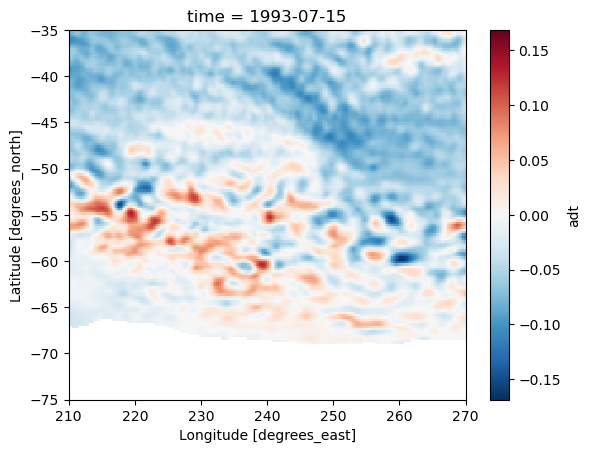

In [111]:
# plt.get_cmap(['cmo_curl'])

ValueError: ['cmo_curl'] is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'